<a href="https://colab.research.google.com/github/VasylDvorakDS/Probability_and_statistics_theory/blob/master/Probability_theory_Home_Work_Lesson_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задача 1**

Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Найдите ковариацию этих двух величин с помощью элементарных действий, а затем с помощью функции cov из numpy Полученные значения должны быть равны. Найдите коэффициент корреляции Пирсона с помощью ковариации и среднеквадратичных отклонений двух признаков, а затем с использованием функций из библиотек numpy и pandas.

In [ ]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Нарисуем график scutterplot с линей регрессии

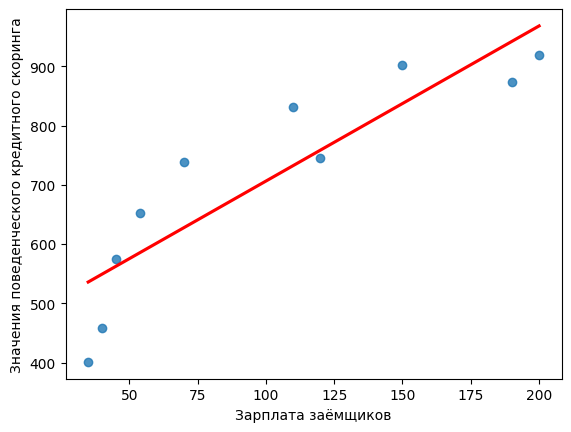

In [ ]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

sns.regplot(x=zp, y=ks, scatter=True, fit_reg=True, ci=None, line_kws={"color":"red"})
plt.xlabel('Зарплата заёмщиков')
plt.ylabel('Значения поведенческого кредитного скоринга', rotation =90)
plt.show();

In [ ]:
cov_manual = np.mean(zp*ks)-np.mean(zp)*np.mean(ks)

cov_func = np.cov(zp,ks, ddof =0)

print(f'Коэффициент ковариации посчитанный вручную {np.round(cov_manual, 2)}')
print(f'Коэффициент ковариации посчитанный с помощью функции {np.round(cov_func[0][1], 2)}')
std_zp = np.std(zp, ddof =0)
std_ks = np.std(ks, ddof =0)
pirson_manual = cov_func[0][1]/(std_zp*std_ks)
pirson_func = np.corrcoef(zp,ks)
print()
print(f'Коэффициент Пирсона посчитанный вручную {np.round(pirson_manual, 3)}')
print(f'Коэффициент Пирсона посчитанный с помощью функции {np.round(pirson_func[0][1], 3)}')

Коэффициент ковариации посчитанный вручную 9157.84
Коэффициент ковариации посчитанный с помощью функции 9157.84

Коэффициент Пирсона посчитанный вручную 0.887
Коэффициент Пирсона посчитанный с помощью функции 0.887


Воспользуемся функцией corr библиотеки pandas:

In [ ]:
df = pd.DataFrame(data={'zp':zp,'ks':ks})
df.corr()

,zp,ks
zp,1.00000,0.88749
ks,0.88749,1.00000


Как видно из графика и расчётов, существует сильная линейная взаимосвязь 0.887 между zp и ks.

**Задача 2**

Измерены значения IQ выборки студентов, обучающихся в местных технических вузах: 131, 125, 115, 122, 131, 115, 107, 99, 125, 111. Известно, что в генеральной совокупности IQ распределен нормально. Найдите доверительный интервал для математического ожидания с надежностью 0.95.

Решение

Нам незвестна сигма генеральной совокупности значит вместо критерия Z мы будем использовать критерий Стьюдента t

In [ ]:
iq = np.array([131, 125, 115, 122, 131, 115, 107, 99, 125, 111])
n=len(iq)
M=np.mean(iq)
D = np.var(iq, ddof=1) # несмещённая дисперсия для выборки a
t_t = stats.t.ppf(1-(1-0.95)/2, n-1)  # табличное значение критерия Стьюдента
addend = t_t*np.sqrt(D/n)
out=[round(v,1) for v in [M-addend, M+addend]]
print('Доверительный интервал: ',out)

Доверительный интервал:  [110.6, 125.6]


**Задача 3**

Известно, что рост футболистов в сборной распределен нормально с дисперсией генеральной совокупности, равной 25 кв.см. Объем выборки равен 27, среднее выборочное составляет 174.2. Найдите доверительный интервал для математического ожидания с надежностью 0.95.

Решение:

Сначала запишем формулу для нахождения доверительного интервала, чтобы она уже была перед глазами, а потом будем думать, что и откуда находить. Поскольку известно среднее квадратичное отклоние генеральной совокупности равное 5 (квадратному корню из дисперсии), то используем формулу с z критерием:


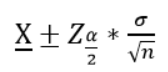

Получим z критерий в данном случае для (1-0.95)/2=2.5%

In [ ]:
z_t=np.abs(stats.norm.ppf(0.025))
print('Табличное значениение Z-критерия z_t=', z_t)

Табличное значениение Z-критерия z_t= 1.9599639845400545


In [ ]:
std=5
n=27
X_=174.2
addend = z_t*std/np.sqrt(n)
out=[round(v,1) for v in [X_-addend, X_+addend]]
print('Доверительный интервал: ',out)

Доверительный интервал:  [172.3, 176.1]
